In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
sys.path.append("../..")

In [3]:
import os
import json
import math
import numpy as np
import pandas as pd
from explorer.utils import load_states_from_dir
import matplotlib.pyplot as plt

In [4]:
log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference_new/"
game_states = load_states_from_dir(log_dir)


Exception Type: AssertionError
Exception Message: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference_new/1702859623772/game_state.json has not ended

Stack Trace:
Traceback (most recent call last):
  File "../../explorer/utils.py", line 111, in load_states_from_dir
    assert (
AssertionError: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference_new/1702859623772/game_state.json has not ended



Exception Type: AssertionError
Exception Message: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference_new/1702861355657/game_state.json has not ended

Stack Trace:
Traceback (most recent call last):
  File "../../explorer/utils.py", line 111, in load_states_from_dir
    assert (
AssertionError: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference_new/1702861355657/game_state.json has not ended



Exception Type: AssertionErro

In [5]:
game_states = [ g for g in game_states if len(g.game_state) >=5]
print(len(game_states))

100


In [6]:
# extract trade object
trade_proposals =[[ _['player_public_info_dict']['newly proposed trade'] for _ in  g.game_state[1:-1]] for g in game_states] 
# extract ZUP remove none
trade_proposals = [[ _.resources_from_second_agent.resource_dict['ZUP'] for _ in tp if _ != "NONE"] for tp in trade_proposals]
print(trade_proposals)
# keep sequences that are long enough
trade_proposals = [ tp for tp in trade_proposals if len(tp) >= 3]
# make triples
trade_proposals = [[[a,b,c] for a,b,c in zip(tp, tp[1:], tp[2:])] for tp in trade_proposals]
# flatten
trade_proposals = np.array([ _ for tp in trade_proposals for _ in tp])

[[30, 28, 29], [35, 25, 32, 28, 30], [25, 22, 23], [35, 30, 33], [30, 25, 28, 26, 27], [45, 40, 42, 41], [30, 27, 28], [40, 35, 38, 36], [30, 25, 28, 26], [25, 23, 24], [50, 45, 48, 47], [35, 30, 32], [25, 20, 23, 21, 22], [30, 25, 28, 26, 27], [25, 20, 23], [45, 40, 42], [30, 20, 27, 23, 26, 24], [45, 42, 44, 43], [50, 40, 45], [25, 20, 23, 21, 22], [50, 40, 45], [25, 20, 23, 21, 22], [30, 25, 28], [25, 22, 23], [40, 36, 38], [40, 50], [50, 45, 47], [30, 25, 28], [35, 50], [35, 33, 34], [50, 45, 47, 46], [50, 45, 48, 46], [35, 32, 34, 33], [40, 30, 35], [45, 42, 44, 43], [50, 45, 47, 46], [40, 25, 37, 30, 35, 32, 35], [40, 36, 38, 37], [35, 30, 32], [40, 35, 38, 36, 37], [35, 30, 33], [50, 45, 47], [30, 28, 29], [25, 22, 23], [25, 20, 22], [30, 20, 26, 23, 24], [50, 40, 45], [30, 25, 28, 26, 27], [40, 55], [30, 25, 28, 26, 27], [50, 60], [35, 30, 33], [40, 52, 55], [50, 45, 48, 46], [35, 30, 32, 31], [30, 25, 28, 26], [30, 25, 28, 26, 27], [40, 35, 37, 36], [30, 25, 28, 26], [30, 50],

In [7]:
# (Trade @ t-1) - (Trade @ t-2)
proposal_average = (trade_proposals[:, 1] + trade_proposals[:, 0])/2
new_proposal =  trade_proposals[:, 2]

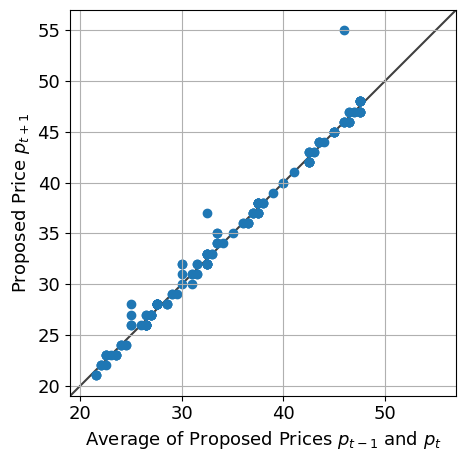

In [8]:
# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots()
ax.scatter(proposal_average, new_proposal)
lims = [
    math.floor(np.min([ax.get_xlim(), ax.get_ylim()])),  # min of both axes
    math.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.set_title('TEST')

ax.set_ylabel('Proposed Price $p_{t+1}$')
ax.set_xlabel('Average of Proposed Prices $p_{t-1}$ and $p_{t}$')
ax.grid()

plt.tight_layout()
# plt.savefig('split_the_diff_plot_1.pdf')  